Threshold limit: 127.0


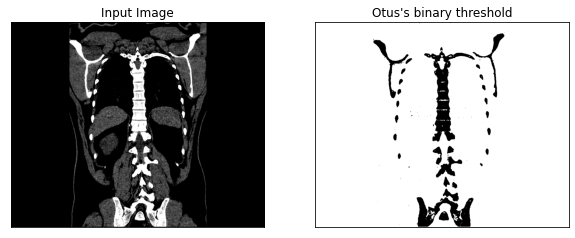

In [94]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('Cyst.jpg')
b,g,r = cv2.split(img)
rgb_img = cv2.merge([r,g,b])

gray_img  = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print("Threshold limit: " + str(ret))

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(thresh, 'gray')
plt.title("Otus's binary threshold"), plt.xticks([]), plt.yticks([])
plt.show()       
plt.savefig('otsu.png')
plt.close()

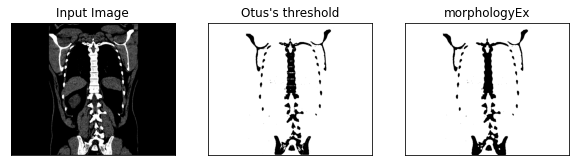

In [95]:
#Specifying the Background and Foreground after Noise Removal
# noise removal
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

plt.figure(figsize=(10, 10))
plt.subplot(131),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(thresh, 'gray')
plt.title("Otus's threshold"), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(opening, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.show()

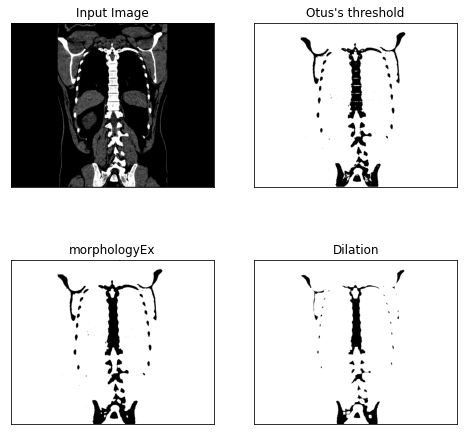

In [98]:
# sure background area
sure_bg = cv2.dilate(opening, kernel, iterations = 3)


plt.figure(figsize=(8,8))
plt.subplot(221),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(thresh, 'gray')
plt.title("Otus's threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(223),plt.imshow(opening, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])
plt.show()

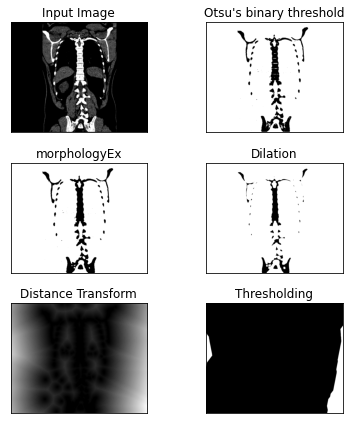

In [97]:
#Performing Distance Transfrom : In distance transfrom, the gray level intensities of the points inside the foreground
# are changed to distance their respective distances from the closest 0 value
  
# sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)


plt.figure(figsize=(6,6))
plt.subplot(321),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(322),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(323),plt.imshow(opening, 'gray')
plt.title("morphologyEx"), plt.xticks([]), plt.yticks([])
plt.subplot(324),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(325),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(326),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

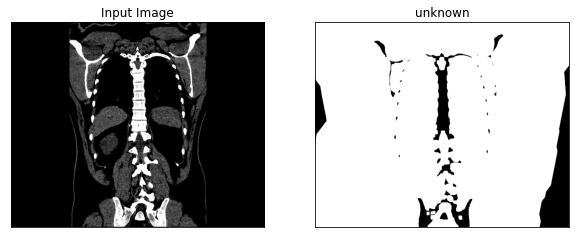

In [99]:
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(unknown, 'gray')
plt.title("unknown"), plt.xticks([]), plt.yticks([])
plt.show()  

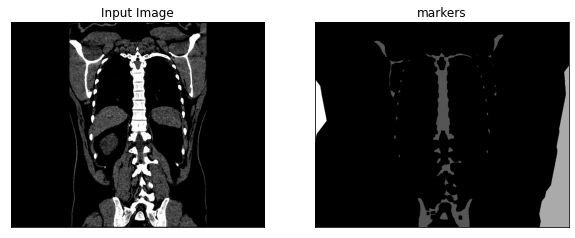

In [100]:
# Connected Components
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown==255] = 0  

plt.figure(figsize=(10, 10))
plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(markers, 'gray')
plt.title("markers"), plt.xticks([]), plt.yticks([])
plt.show()  

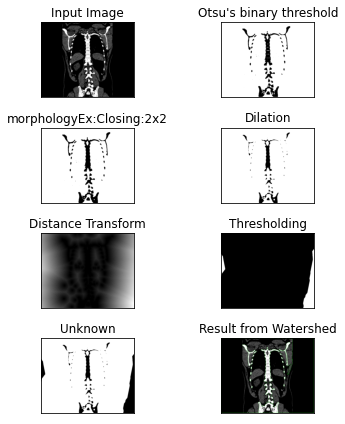

In [101]:
#Applying Watershed Segmentation
markers = cv2.watershed(img, markers)
img[markers == -1] = [0, 255,0]


plt.figure(figsize=(6, 6))
plt.subplot(421),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(422),plt.imshow(thresh, 'gray')
plt.title("Otsu's binary threshold"), plt.xticks([]), plt.yticks([])

plt.subplot(423),plt.imshow(opening, 'gray')
plt.title("morphologyEx:Closing:2x2"), plt.xticks([]), plt.yticks([])
plt.subplot(424),plt.imshow(sure_bg, 'gray')
plt.title("Dilation"), plt.xticks([]), plt.yticks([])

plt.subplot(425),plt.imshow(dist_transform, 'gray')
plt.title("Distance Transform"), plt.xticks([]), plt.yticks([])
plt.subplot(426),plt.imshow(sure_fg, 'gray')
plt.title("Thresholding"), plt.xticks([]), plt.yticks([])

plt.subplot(427),plt.imshow(unknown, 'gray')
plt.title("Unknown"), plt.xticks([]), plt.yticks([])

plt.subplot(428),plt.imshow(img, 'gray')
plt.title("Result from Watershed"), plt.xticks([]), plt.yticks([])

plt.tight_layout()
plt.show()

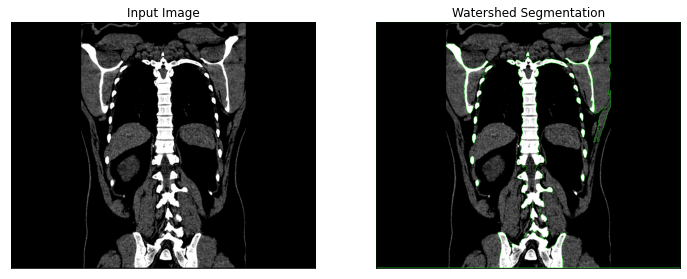

<Figure size 432x288 with 0 Axes>

In [103]:
plt.figure(figsize=(12, 12))
plt.subplot(121),plt.imshow(rgb_img)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img, 'gray')
plt.title("Watershed Segmentation"), plt.xticks([]), plt.yticks([])
plt.show()    
plt.savefig('myfig')

In [89]:
# Window name in which image is displayed
window_name = 'image'
  
# Using cv2.imshow() method 
# Displaying the image 
cv2.imshow(window_name, img)
  
#waits for user to press any key 
#(this is necessary to avoid Python kernel form crashing)
cv2.waitKey(0) 
  
#closing all open windows 
cv2.destroyAllWindows() 